In [1]:
#importing packages and libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
dataset = pd.read_csv('Drug_Consumption_Quantified.csv')

In [3]:
#number of rows and columns
dataset.shape

(1884, 32)

In [4]:
#checking for possible missing values
dataset.isna().sum().sum()

0

In [5]:
dataset.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [6]:
# Overclaimers
dataset.query("Semer != 'CL0'")

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
726,730,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,...,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
816,821,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,...,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1515,1520,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,...,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1532,1537,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,...,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1697,1702,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,...,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1768,1773,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,...,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1805,1810,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,...,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1822,1827,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,...,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [7]:
#dropping overclaimers since their answers might not truly be correct
dataset = dataset.drop(dataset[dataset['Semer'] != 'CL0'].index)

#dropping unnecesary columns
dataset = dataset.drop(['Choc','Semer'], axis=1)
dataset = dataset.reset_index(drop=True)
dataset = dataset.drop('ID', axis=1)

In [8]:
dataset.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0


In [9]:
dataset.iloc[:,:]

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL5
1872,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0
1873,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0
1874,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0


In [10]:
dataset.iloc[1]

Age          0.49788
Gender      -0.48246
Education   -0.05921
Country      0.96082
Ethnicity   -0.31685
Nscore      -0.46725
Escore       0.80523
Oscore      -0.84732
AScore       -1.6209
Cscore       -1.0145
Impulsive   -1.37983
SS           0.40148
Alcohol          CL6
Amphet           CL0
Amyl             CL0
Benzos           CL0
Caff             CL6
Cannabis         CL3
Coke             CL0
Crack            CL0
Ecstasy          CL0
Heroin           CL0
Ketamine         CL0
Legalh           CL0
LSD              CL0
Meth             CL0
Mushrooms        CL1
Nicotine         CL0
VSA              CL0
Name: 1, dtype: object

In [11]:
dataset['Age']

0      -0.07854
1       0.49788
2      -0.95197
3       0.49788
4       2.59171
         ...   
1871   -0.95197
1872   -0.95197
1873   -0.07854
1874   -0.95197
1875   -0.95197
Name: Age, Length: 1876, dtype: float64

In [12]:
dataset.iloc[:,1].unique()

array([-0.48246,  0.48246])

In [13]:
dataset.iloc[:,1].value_counts()

Gender
-0.48246    940
 0.48246    936
Name: count, dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1876 non-null   float64
 1   Gender     1876 non-null   float64
 2   Education  1876 non-null   float64
 3   Country    1876 non-null   float64
 4   Ethnicity  1876 non-null   float64
 5   Nscore     1876 non-null   float64
 6   Escore     1876 non-null   float64
 7   Oscore     1876 non-null   float64
 8   AScore     1876 non-null   float64
 9   Cscore     1876 non-null   float64
 10  Impulsive  1876 non-null   float64
 11  SS         1876 non-null   float64
 12  Alcohol    1876 non-null   object 
 13  Amphet     1876 non-null   object 
 14  Amyl       1876 non-null   object 
 15  Benzos     1876 non-null   object 
 16  Caff       1876 non-null   object 
 17  Cannabis   1876 non-null   object 
 18  Coke       1876 non-null   object 
 19  Crack      1876 non-null   object 
 20  Ecstasy 

In [15]:
dataset.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,0.037332,-0.001029,-0.000953,0.358663,-0.309960,-0.000718,-0.001646,-0.002915,-0.000169,-0.000391,0.005412,-0.006782
std,0.878557,0.482588,0.950084,0.699755,0.165959,0.998682,0.997596,0.995866,0.996730,0.997923,0.954389,0.961949
min,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.628243,0.529750,0.765400
max,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [16]:
dataset.describe(include = 'all')

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,...,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,7,7,7,7,7,7,7,7,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1621,1019,1599,1487,1091,1068,1423,981,607,1451
mean,0.037332,-0.001029,-0.000953,0.358663,-0.309960,-0.000718,-0.001646,-0.002915,-0.000169,-0.000391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.878557,0.482588,0.950084,0.699755,0.165959,0.998682,0.997596,0.995866,0.996730,0.997923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.628243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


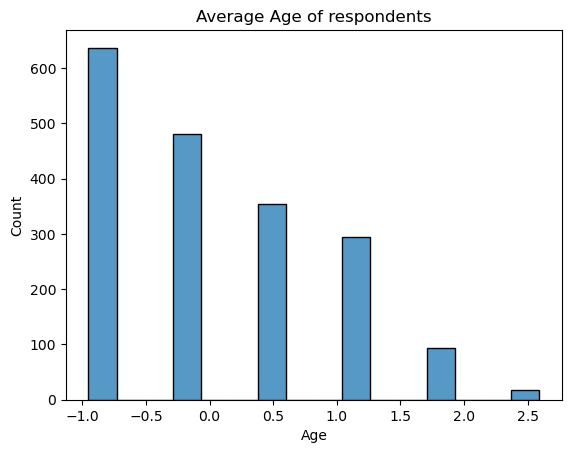

In [17]:
#Average Age distribution of respondants from differnt age groups
sns.histplot(dataset.Age)
plt.title('Average Age of respondents')
plt.show()

In [18]:
drugs = ['Alcohol',
         'Amyl',
         'Amphet',
         'Benzos',
         'Caff',
         'Cannabis',
         'Coke',
         'Crack',
         'Ecstasy',
         'Heroin',
         'Ketamine',
         'Legalh',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'VSA'    ]

In [19]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL5':
        return 5
    elif x == 'CL6':
        return 6
    else:
        return 7

In [20]:
for column in drugs:
    dataset[column] = dataset[column].apply(drug_encoder)

In [21]:
drug_mean = []
for column in drugs:
    mean = dataset[column].mean()
    drug_mean.append(mean)

In [22]:
drug_dic = {'drug': drugs,
            'average_use': drug_mean}
drug_use = pd.DataFrame.from_dict(drug_dic)
drug_use = drug_use.sort_values(['average_use'], ascending=False)

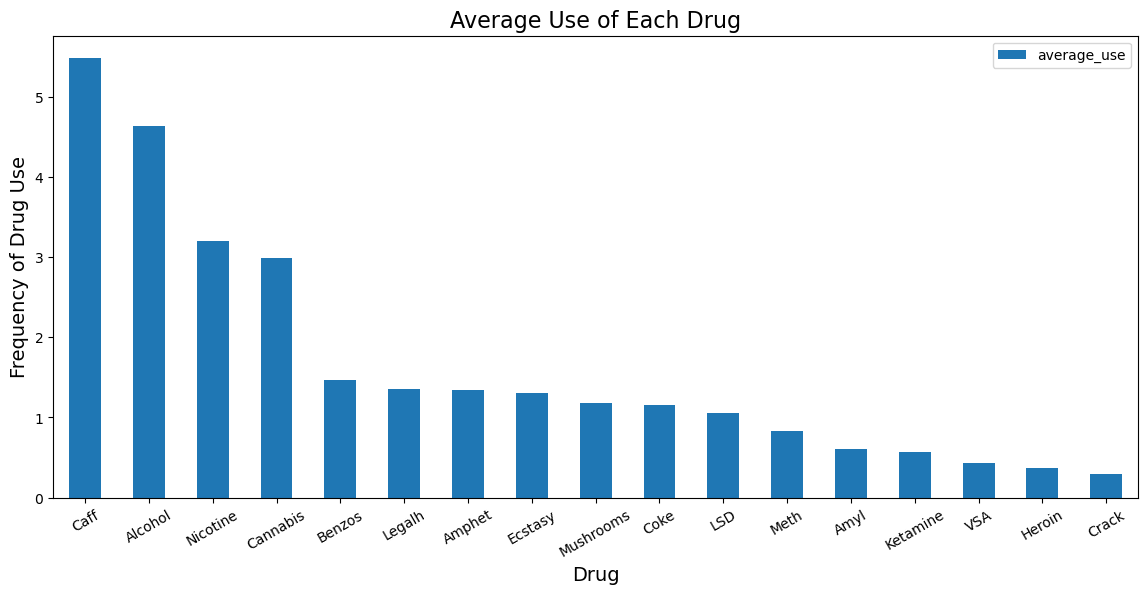

In [23]:
drug_use.plot(kind='bar', x='drug', y='average_use', figsize=(14, 6))
plt.title('Average Use of Each Drug', size=16)
plt.xlabel('Drug', size=14)
plt.xticks(rotation=30)
plt.ylabel('Frequency of Drug Use', size=14)
plt.show()

In [24]:
legal_df = dataset[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                 'Nscore','Escore','Oscore', 'AScore','Cscore',
                 'Impulsive','SS','Alcohol','Nicotine', 'Benzos']]

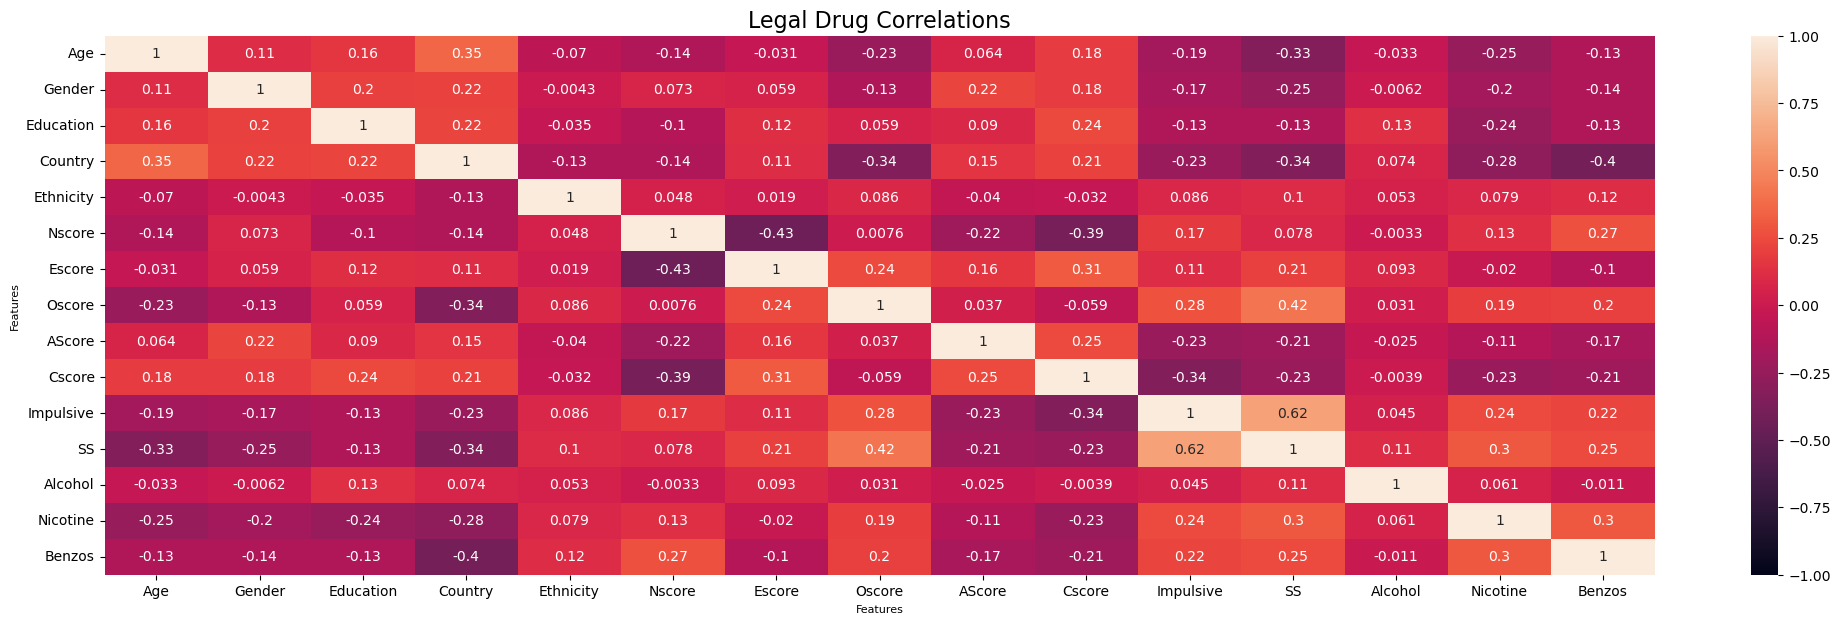

In [25]:
corr = legal_df.corr()
plt.figure(figsize=(25,7))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Legal Drug Correlations', size=16)
plt.xlabel('Features', size=8)
plt.ylabel('Features', size=8)
plt.show()

<Axes: >

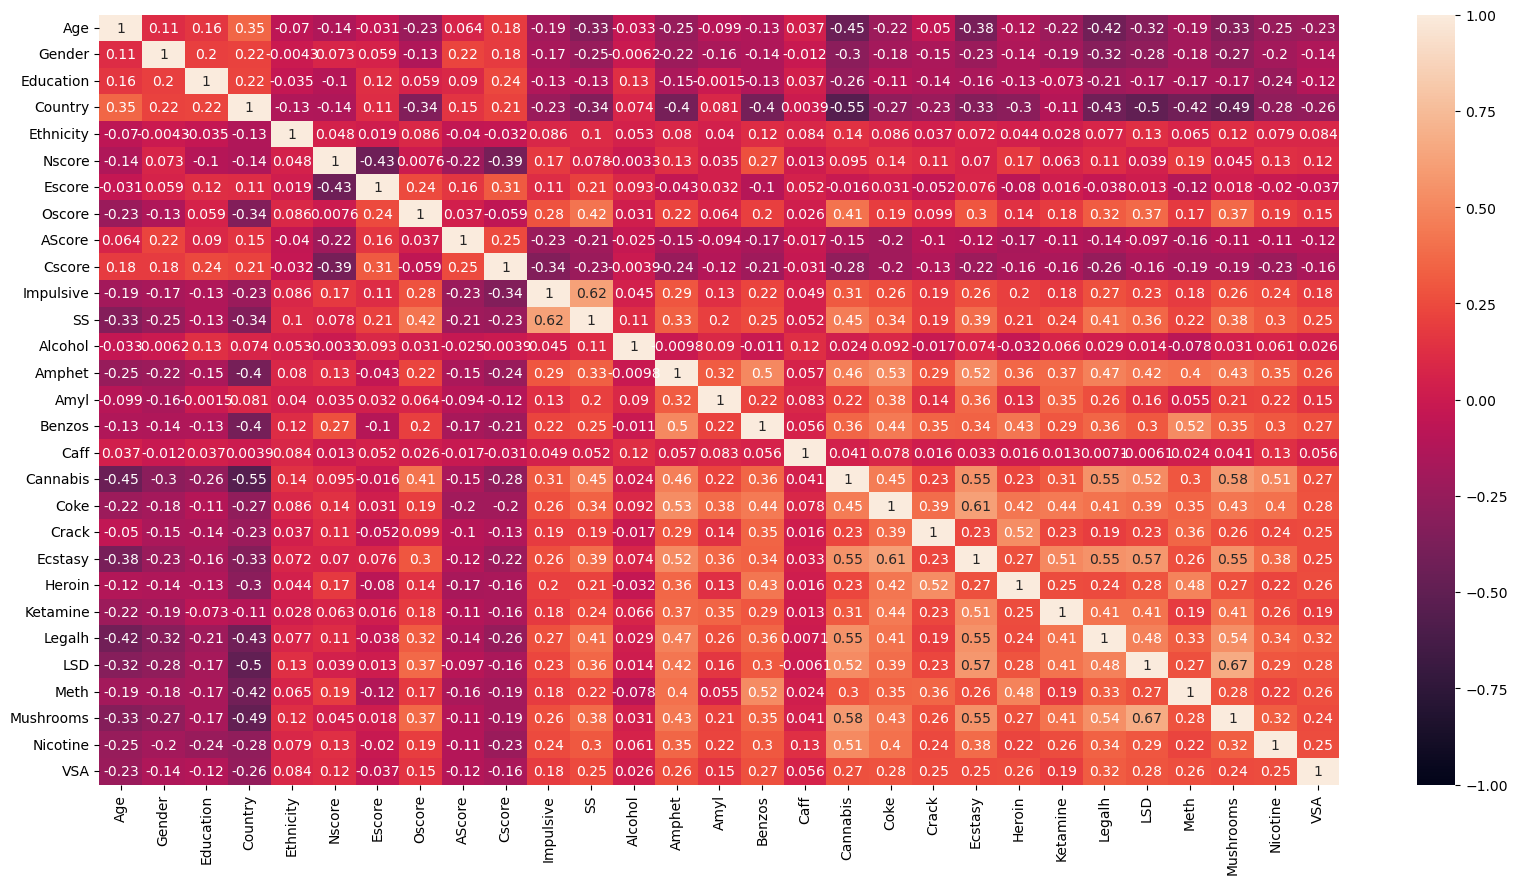

In [26]:
corr = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

In [27]:
low_corr = ['Age', 'Gender', 'Education', 'Alcohol','AScore','Caff']
for column in low_corr:
    dataset = dataset.drop(column, axis=1)
dataset.head()

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,...,0,4,0,2,0,2,3,0,4,0
1,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084,0,0,...,0,0,0,2,0,0,0,0,2,0
3,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575,1,1,...,0,1,0,0,1,0,0,2,2,0
4,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,1.63088,-1.37983,-1.54858,0,0,...,0,0,0,0,0,0,0,0,6,0


In [28]:
print(f'In the new dataframe there are now {dataset.shape[0]} rows and {dataset.shape[1]} columns')

In the new dataframe there are now 1876 rows and 23 columns


In [29]:
#We will create three seperate datasets to asses predict whether an indivudal uses cocaine, methamphetamines, or heroin.
#Combining cocaine and crack cocaine usage into one feature
cocaine_df = dataset.copy()
cocaine_df['coke_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['crack_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['both_user'] = cocaine_df[['coke_user', 'crack_user']].iloc[:].sum(axis=1)
cocaine_df['Cocaine_User'] = cocaine_df['both_user'].apply(lambda x: 1 if x > 0 else 0)
cocaine_df = cocaine_df.drop(['coke_user', 'crack_user', 'both_user' ], axis=1)

In [30]:
meth_df = dataset.copy()
meth_df['Meth_User'] = meth_df['Meth'].apply(lambda x: 1 if x not in [0,1] else 0)
meth_df = meth_df.drop(['Meth'], axis=1)

In [31]:
heroin_df = dataset.copy()
heroin_df['Heroin_User'] = heroin_df['Heroin'].apply(lambda x: 1 if x not in [0,1] else 0)
heroin_df = heroin_df.drop(['Heroin'], axis=1)

In [32]:
nic_df = dataset.copy()
nic_df['Nicotine_User'] = nic_df['Nicotine'].apply(lambda x: 1 if x not in [0,1] else 0)
nic_df = nic_df.drop(['Nicotine'], axis=1)

In [33]:
cocaine_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Cocaine_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,...,4,0,2,0,2,3,0,4,0,1


In [34]:
meth_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Mushrooms,Nicotine,VSA,Meth_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,...,0,4,0,2,0,2,0,4,0,1


In [35]:
heroin_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,...,Crack,Ecstasy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Heroin_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,...,0,4,2,0,2,3,0,4,0,0


In [36]:
nic_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA,Nicotine_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,...,0,4,0,2,0,2,3,0,0,1


In [37]:
#splitting our dataset into two parts — training data and testing data
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

#importing LogisticRegression & RandomForest classification models to the training set
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [38]:
def preprocessing_inputs(df, column):
    df = df.copy()
    
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [39]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

In [40]:
X_train, X_test, y_train, y_test = preprocessing_inputs(cocaine_df, 'Cocaine_User')

In [41]:
X_train.head()

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
1604,0.866265,0.575283,0.125548,1.298214,-0.993606,-0.000636,-0.231800,-0.215230,-0.177662,0.354145,...,-0.351626,-0.796340,-0.354437,-0.458628,-0.760352,-0.723484,-0.504662,-0.810020,-0.908957,0.596800
58,0.866265,-0.033985,-0.476068,-1.253935,-1.293555,-0.136881,-1.437385,-1.598342,-0.742266,-0.581097,...,-0.351626,-0.796340,-0.354437,-0.458628,-0.760352,-0.723484,-0.504662,-0.810020,-1.323754,-0.448994
1215,-1.323122,-0.033985,1.008192,0.970188,0.279177,-0.893717,0.906948,0.425285,0.951546,-0.581097,...,-0.351626,1.018106,1.663230,-0.458628,0.923498,-0.723484,3.091505,0.566005,1.165025,1.642594
1361,-1.323122,-0.033985,0.213171,-1.791890,0.432018,-1.380275,-1.437385,-0.869641,-0.742266,-0.581097,...,-0.351626,1.018106,-0.354437,2.033915,2.046064,1.296168,1.892782,1.254017,-0.494161,-0.448994
771,-1.323122,-0.033985,0.125548,-0.451375,-0.864302,-0.000636,-0.744161,-1.598342,2.645357,-0.581097,...,2.029588,0.413290,2.672063,-0.458628,-0.760352,0.622951,3.091505,0.566005,1.165025,-0.448994


In [42]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1500, 23) (1500,)
Test set: (376, 23) (376,)


In [43]:
models = {
            '     Logisitc Regression': LogisticRegression(),
            'Random Forest Classifier': RandomForestClassifier()}

In [44]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
Random Forest Classifier trained.


In [45]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 100.00%
Random Forest Classifier Accuracy: 100.00%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 1.0
Random Forest Classifier F1-Score: 1.0


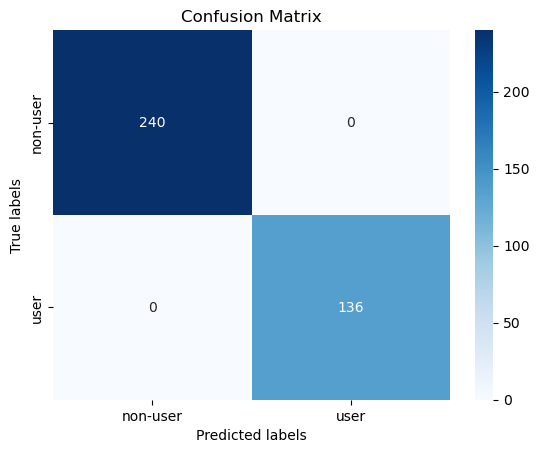

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

In [47]:
X_train, X_test, y_train, y_test = preprocessing_inputs(meth_df, 'Meth_User')

In [48]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
Random Forest Classifier trained.


In [49]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 85.11%
Random Forest Classifier Accuracy: 85.64%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.62162
Random Forest Classifier F1-Score: 0.63014


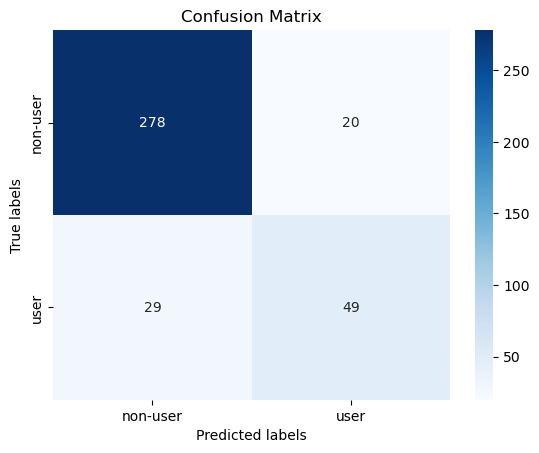

In [50]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

In [51]:
X_train, X_test, y_train, y_test = preprocessing_inputs(heroin_df, 'Heroin_User')

In [52]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
Random Forest Classifier trained.


In [53]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 90.69%
Random Forest Classifier Accuracy: 90.96%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.53333
Random Forest Classifier F1-Score: 0.5641


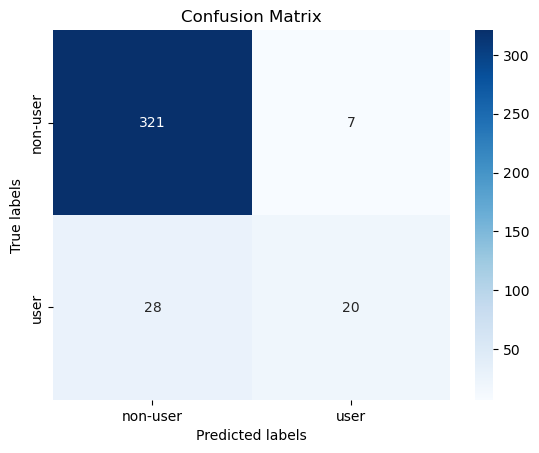

In [54]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)